<a href="https://colab.research.google.com/github/Yoma-Healings/AR/blob/main/fintech_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('fintech_transactions.csv')
df.head()

,transaction_id,transaction_date,amount,currency,payment_method,transaction_status,customer_type,state,platform
0,TXN000001,2023-01-01 00:00:00,190.40,NGN,USSD,Success,New,Lagos,Mobile
1,TXN000002,2023-01-01 01:00:00,475.60,NGN,Card,Success,Returning,Kaduna,Web
2,TXN000003,2023-01-01 02:00:00,367.34,NGN,Card,Success,Returning,Rivers,Mobile
3,TXN000004,2023-01-01 03:00:00,301.34,NGN,Bank Transfer,Success,Returning,Abuja,Mobile
4,TXN000005,2023-01-01 04:00:00,82.23,NGN,Card,Success,Returning,Rivers,Mobile


# Total Transactions & Total Revenue


In [4]:
# Total Transactions
total_transactions=len(df)
#  Total Revenue
total_revenue=df['amount'].sum()

In [7]:
print(f"Total Transactions:{total_transactions}")
print(f"Total Revenue (Success Transactions): ₦{total_revenue:,.2f}")

Total Transactions:50000
Total Revenue (Success Transactions): ₦12,596,869.17


#Transaction Status Breakdown

In [8]:
status_counts = df['transaction_status'].value_counts()
print(status_counts)

transaction_status
Success    42397
Failed      5081
Pending     2522
Name: count, dtype: int64


#Revenue by Payment Method

In [14]:
revenue_by_method = df.groupby('payment_method')['revenue'].sum().sort_values(ascending=False)
print(revenue_by_method)

payment_method
Card             5365504.16
Bank Transfer    3225084.46
USSD             2094961.03
Name: revenue, dtype: float64


In [13]:
df[['amount', 'transaction_status', 'revenue']].head()

,amount,transaction_status,revenue
0,190.40,Success,190.40
1,475.60,Success,475.60
2,367.34,Success,367.34
3,301.34,Success,301.34
4,82.23,Success,82.23


#Platform Usage (Web vs Mobile)

In [15]:
platform_usage = df['platform'].value_counts()
print(platform_usage)


platform
Mobile    32591
Web       17409
Name: count, dtype: int64


#Customer Type Insights (New vs Returning)

In [16]:
customer_revenue = df.groupby('customer_type')['revenue'].sum()
print(customer_revenue)

customer_type
New          4272180.22
Returning    6413369.43
Name: revenue, dtype: float64


#State-Level Revenue (Lagos vs Rivers)

In [17]:
state_revenue = df.groupby('state')['revenue'].sum().sort_values(ascending=False)
print(state_revenue)

state
Abuja     1806104.52
Kaduna    1795908.81
Kano      1785532.22
Lagos     1777288.45
Rivers    1766712.01
Oyo       1754003.64
Name: revenue, dtype: float64


#Monthly Revenue Trend

In [20]:
monthly_revenue = df.groupby('month_name')['revenue'].sum().reset_index()

# Optional: Sort months chronologically
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

monthly_revenue['month_name'] = pd.Categorical(monthly_revenue['month_name'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month_name')

print(monthly_revenue)


   month_name    revenue
4     January  951115.39
3    February  875064.94
7       March  950247.07
0       April  938517.86
8         May  952442.02
6        June  927465.55
5        July  949057.49
1      August  954019.35
11  September  848612.12
10    October  791975.36
9    November  756526.13
2    December  790506.37


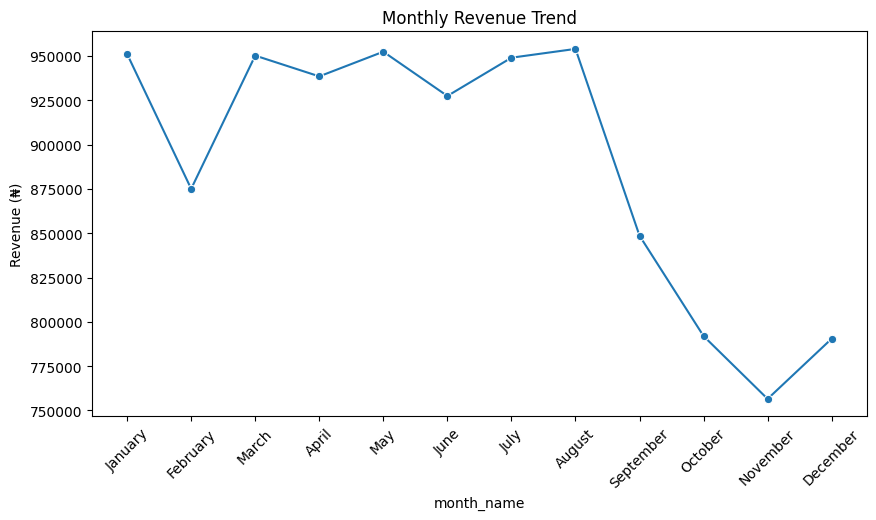

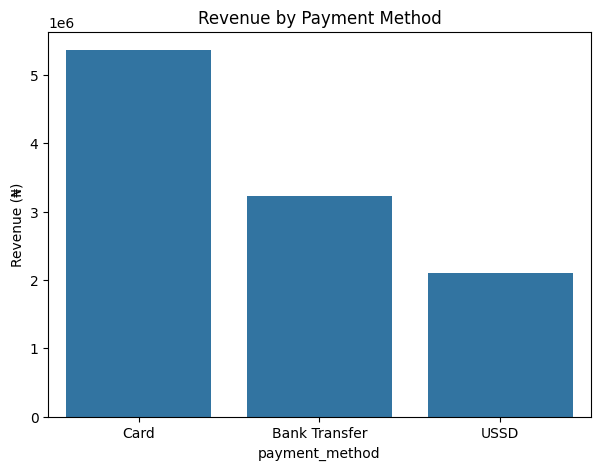

In [21]:
# Monthly Revenue Trend
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='month_name', y='revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.ylabel('Revenue (₦)')
plt.show()

# Revenue by Payment Method
plt.figure(figsize=(7,5))
sns.barplot(x=revenue_by_method.index, y=revenue_by_method.values)
plt.title('Revenue by Payment Method')
plt.ylabel('Revenue (₦)')
plt.show()